In [1]:
%matplotlib inline
from fancy_plot import *
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Energy Spline

[[0.9852723813715435 0.9852723813715435 0.9852723813715435 ...,
  0.019589851263512634 0.019589851263512634 0.019589851263512634]
 [0.9852723813715435 0.9852723813715435 0.9852723813715435 ...,
  0.019589851263512634 0.019589851263512634 0.019589851263512634]
 [0.9852723813715435 0.9852723813715435 0.9852723813715435 ...,
  0.019589851263512634 0.019589851263512634 0.019589851263512634]
 ..., 
 [0.014291856141736958 0.014291856141736958 0.014291856141736958 ...,
  1.1290312404655005 1.1290312404655005 1.1290312404655005]
 [0.014291856141736958 0.014291856141736958 0.014291856141736958 ...,
  1.1290312404655005 1.1290312404655005 1.1290312404655005]
 [0.014291856141736958 0.014291856141736958 0.014291856141736958 ...,
  1.1290312404655005 1.1290312404655005 1.1290312404655005]]


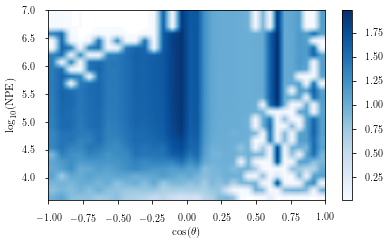

In [3]:
fig, ax = newfig(0.9)
spline = np.load('E_spline.npy')[()]
xdots = 1000
ydots = 1000
x = np.linspace(-1,1,xdots)
y = np.linspace(3.6,7,ydots)
data = spline(x,y)
data = np.ma.array(data)
data.mask = data <=0
print data
# norm=colors.LogNorm(vmin=data.min(), vmax=data.max())
cbar = ax.pcolormesh(x,y,  data.T , cmap=plt.get_cmap('Blues'))
plt.colorbar(cbar)
ax.set_xlabel(r'$\mathrm{cos}(\theta)$')
ax.set_ylabel(r'$\mathrm{log}_{10}(\mathrm{NPE})$')
# ax.plot(x1, 3.6+2.99*np.sqrt(1-((x1-0.93)/0.83)**2), color='black')
plt.axis([x.min(), x.max(), y.min(), y.max()])
# plt.savefig('../BlazarNeutrino/plots/energy_mpe_spline.png', dpi=300)
plt.show()

# P-Val dist

In [212]:
x = np.load('./data/pvals.npy')

In [215]:
vals, bins = np.histogram(x[(x<np.max(x)) & (x>0)], bins = 100, normed = True)

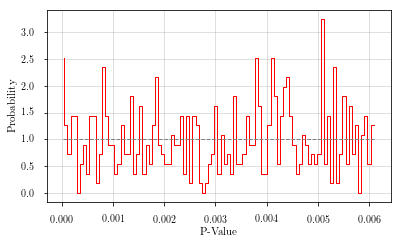

In [222]:
fig, ax = newfig(0.9)
ax.step(setNewEdges(bins),vals*(np.max(bins)-np.min(bins)))
# ax.set_yscale('log')
ax.set_ylabel('Probability')
ax.set_xlabel('P-Value')
line_x = np.linspace(np.min(bins),np.max(bins),1000 )
plt.plot(line_x , np.ones(1000), color='grey', linestyle = '--')
plt.grid()
# plt.savefig('pvals.pdf')
plt.show()

# TS - Dist

In [187]:
llh = np.load('./output/wo_E_weights_llh_100000_2.10_1.npy')

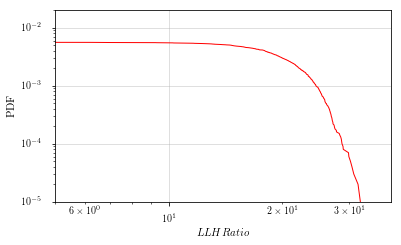

In [188]:
fig, ax = newfig(0.9)
X2 = np.sort(llh)
F2 = np.ones(len(llh)) - np.array(range(len(llh))) / float(len(llh))
ax.plot(X2, F2)
ax.set_xlabel(r'$LLH Ratio$')
ax.set_ylabel('PDF')
ax.set_yscale('log')
ax.set_xlim(5)
ax.set_ylim(1e-5,0.02)
plt.grid(True)
plt.savefig('noE_TS_dist_1e5.pdf')
ax.set_xscale('log')

In [127]:
np.random.uniform(0,3)

2.2596521815107